#Reproducción del Artículo de Watts y Strogatz de 1998

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Watts y Strogatz

http://snap.stanford.edu/class/cs224w-readings/watts98smallworld.pdf

## Función anillo
En la siguiente celda puedes decidir la cantidad de nodos adyacentes en el anillo con los que cada nodo estará conectado. Se necesita que estén conectados, como mínimo, a segundos vecinos para que el coeficiente de clustering sea distinto de cero. Juega con esa variable descomentando las líneas (o generando nuevas) y con el número de nodos de la red para ver cómo se comporta el coeficiente de clustering de los nodos.

Notar que se modificó un poco la definición de la red anillo, introduciendo un segundo parámetro (```l```) para determinar con cuántos "l-vecinos" estará conectado cada nodo.


In [ ]:


#Red Anillo regular

def Anillo(N, l = 2):
    nodos = np.arange(N)
    G = nx.Graph()
    G.add_nodes_from( nodos )
    
    for i in range(l):
        G.add_edges_from( zip( nodos, np.roll(nodos, i+1) ) )
    return G

el coeficiente de clustering de la red es :  0.5


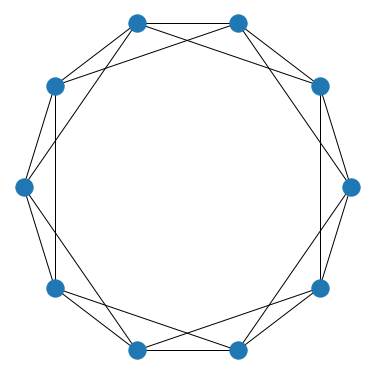

In [ ]:
G = Anillo(10, ) 
print('el coeficiente de clustering de la red es : ', nx.clustering(G)[0])
plt.figure(figsize = [5,5])
nx.draw_circular(G)


In [ ]:
nx.diameter(G)

3

Ahora se presenta la misma red pero se distingue al primer nodo añadido, sólo con la intención de que lo distingan y lo utilicen como referencia cuando la red empiece a ser modificada. Ese es el nodo 0. En la siguiente celda también se calcula el diámetro de la red. Hasta ahora, como pueden verificarlo, el diámetro de la red es una función lineal del tamaño de los nodos; no tiene, en absoluto, la propiedad de mundo pequeño.

¿Cómo se relaciona el diámetro con la definición de la red, es decir, si los nodos se conectan a segundos, terceros, cuartos, etc., vecinos?

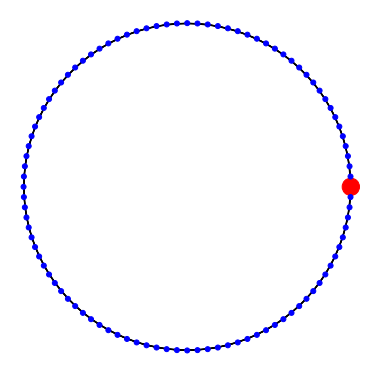

Clustering =  0.600000000000001
Diametro =  17


In [ ]:
G = Anillo(100,3)
#print(len(G))

N = len(G)
tamanos = [300]
tamanos = tamanos + (N-1)*[25]
colores = ['red']
colores = colores + (N-1)*['blue']

plt.figure(figsize = [5,5])
nx.draw_circular(G, node_size = tamanos, node_color = colores)
plt.show()

print('Clustering = ', nx.average_clustering(G) ) 
print('Diametro = ', nx.diameter(G) ) 

## Matriz de distancia, distancia promedio y diámetro
Ahora, para visualizar el comportamiento de las distancias entre cualquier pareja de nodos, utilizamos una representación gráfica (mediante ```imshow```) de la matriz de distancias entre nodos.
Para ello se genera una matriz cuadrada de $N \times N$ y se asigna a cada entrada $(i,j)$ la distancia $d_{ij}$ entre los nodos $(i,j)$.

Después, mediante el uso de la función ```plt.subplots``` se visualizan la matriz de adyacencia y la red juntas. Utilicen esta representación para comprender la estructura de la matriz de distancias y cómo se relacionan el diámetro y la distancia promedio.

In [ ]:
# Matriz de distancias y distancias caracteristicas

MatD0 = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD0[i,j] = nx.shortest_path_length(G, i, j)
dmin = np.min(MatD0)
dmax = np.max(MatD0)

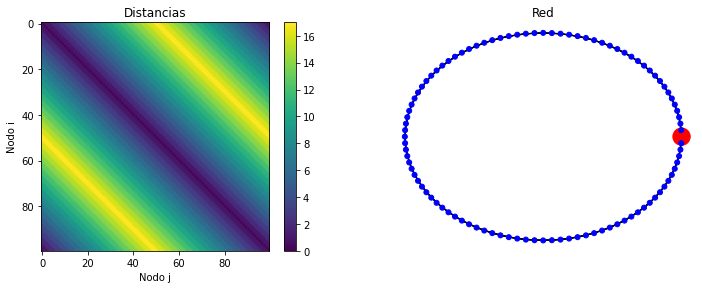

Distancia máxima entre nodos (diámetro): 	 17.0
Distancia promedio entre nodos: 		 8.67
Coeficiente de clustering promedio de la red: 	 0.600000000000001


In [ ]:
h = .6 #parametro para jugar con el tamaño de la imagen
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)


pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()

print('Distancia máxima entre nodos (diámetro): \t', np.max(MatD0))
print('Distancia promedio entre nodos: \t\t', np.mean(MatD0))
print('Coeficiente de clustering promedio de la red: \t', nx.average_clustering(G))


## Función cambio de enlaces
La idea principal de Watts y Strogatz fue reducir la distancia entre todas las parejas de nodos cambiando de forma aleatoria enlaces. Esto generaría "puentes" entre enlaces que originalmente están lejanos pero que podrían modificar la estructura completa de las distancias. Veamos esto con detalle.

Primero hay que definir una red ```cambio_enlace``` que hace lo siguiente:
- selecciona un nodo aleatorio de la red mediante la función ```np.random.choice``` que toma un objeto iterable y regresa un elemento al azar. 
- selecciona un nodo entre los vecinos del primer nodo.
- remueve el enlace entre esos dos nodos
- de los nodos restantes, elije uno al azar. Para esto se utiliza la estructura de conjuntos en python. Los conjuntos pueden restarse para sacar los elementos de un conjunto de entre los elementos de otro. Aquí se toma el conjunto de los nodos de G mediante ```set(G)``` y se le quitan dos conjuntos: el conjunto de los vecinos del nodo original, mediante ```set(G[nodo1])``` y el conjunto cuyo único elemento es el nodo original ```set([nodo1])```.
- se establece el nuevo enlace entre el nodo original y el nuevo nodo.

In [ ]:
def cambio_enlace(G):
  # ojo con el uso de los conjutos (set)
  nodo1 = np.random.choice(G)
  nodo2 = np.random.choice( G[nodo1] )
  G.remove_edge(nodo1, nodo2)
  seleccion = set(G) - set(G[nodo1]) - set([nodo1])
  
  nuevo_nodo = np.random.choice( list(seleccion) )
  
  G.add_edge(nodo1, nuevo_nodo)


Para aplicarlo a una red y luego comparar las modificaciones, se genera una red y su copia, y se le aplica el reenlace y se visualizan la red y la matriz de distancias.
- Genera una red anillo con los parámetros que elijas.
- Luego corre la casilla que dice "Modificación de la red". Esa casilla puedes correrla muchas veces para ver qué ocurre con la red y con la matriz si se modifican uno, dos, tres, cuatro, etc., enlaces. 
- Para reiniciar debes volver a correr la casilla que dice "Generar redes"

Algunas preguntas para orientar la observación:
- ¿Por qué la primera modificación del enlace no disminuye el diámetro?
- ¿Qué característica tienen los nuevos enlaces que disminuyen más la distancia promedio?
- ¿Qué característica tienen los nuevos enlaces que casi no disminuyen la distancia promedio?
- ¿Cuántos cambios de enlace debes realizar para que el coeficiente de clustering disminuya a la mitad? ¿Qué pasó en ese caso con la distancia promedio y el diámetro?

In [ ]:
# Generar redes
N = 100
l = 3

G = Anillo(N, l)

G2 = G.copy()

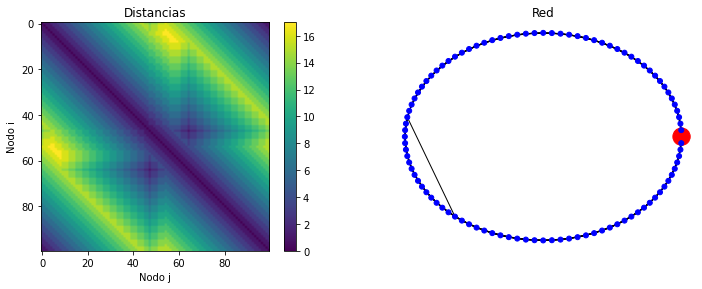

Diametro: 		 17.0 --> 17.0
Distancia media: 	 8.67 --> 7.9528
Clustering: 		 0.600000000000001 --> 0.5966190476190486


In [ ]:
# Modificación de la red

cambio_enlace(G2)

MatD = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

        
        
h = .6

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: \t\t', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: \t', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: \t\t', nx.average_clustering(G), '-->', nx.average_clustering(G2))


Para responder a las preguntas anteriores se puede hacer el proceso de forma más sistemática si se usa un bucle para aplicar la función varias veces. Juega con eso en la siguiente casilla. Como puedes ver, el bucle sólo toma cinco líneas, el resto son instrucciones para la visualización y comparación de las redes y las matrices, inciales y finales.

### Varias veces

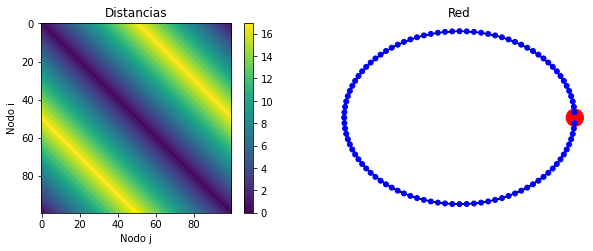

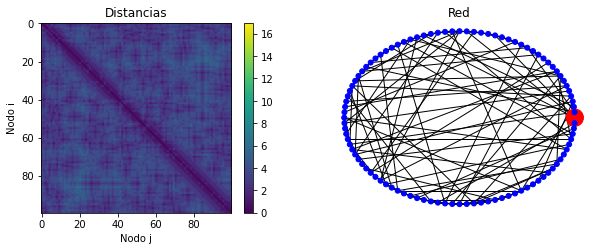

Diametro:  17.0 --> 6.0
Distancia media:  8.67 --> 3.0482
Clustering:  0.600000000000001 --> 0.2965555555555553


In [ ]:
G2 = G.copy()

veces = 77

for k in range(veces):
    cambio_enlace(G2)


MatD = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

        
        
h = .5

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: ', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: ', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: ', nx.average_clustering(G), '-->', nx.average_clustering(G2))

### Comportamiento de diámetro, distancia media y clustering

Como ejercicio. Genera ahora unas gráficas de diámetro, distancia media y clustering en función del número de enlaces que se modificaron en la red. Lo que se quiere es visualizar cuál disminuye más rápido, y qué tan rápido.

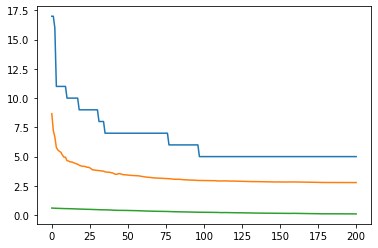

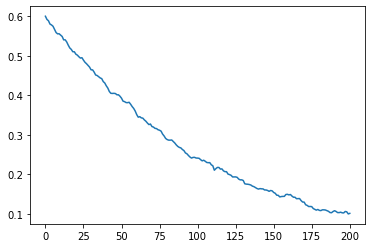

In [ ]:

G3=G.copy()
    
MatD1 = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD1[i,j] = nx.shortest_path_length(G3, i, j)
dmin = np.min(MatD1)
dmax = np.max(MatD1)




     



Diam = [np.max(MatD1)]
Dist = [np.mean(MatD1)]
Clus = [nx.average_clustering(G3)]





k =  200

for i in range(k):

    cambio_enlace(G3)

    
    for i in range(N):
        for j in range(N):
            MatD1[i,j] = nx.shortest_path_length(G3, i, j)
            dmin = np.min(MatD1)
            dmax = np.max(MatD1)
            

    

    

    Diam.append(np.max(MatD1))
    Dist.append(np.mean(MatD1))
    Clus.append(nx.average_clustering(G3))



plt.plot(Diam)
plt.plot(Dist)
plt.plot(Clus)
plt.show()


plt.plot(Clus)
plt.show()

¿Qué puedes decir respecto al comportamiento de las distancias y el clustering? ¿Cómo decaen? ¿Cuál decae más rápido?


Para disminuir las fluctuaciones, puedes hacer varias corridas, guardar toda la información de cada corrida y al final promediarlo. A continuación se les proporciona el inicio y el final del proceso, en medio deben rellenar con el procedimiento que hicieron antes:

(se les recomiendan 15 corridas, para que no tarde tanto)

101
101
101


In [ ]:
# Se generan las listas donde se introducirán las listas de los valores de cada corrida.

DIAM = []
DIST = []
CLUS = []

corridas = 15

for l in range(corridas):

    
    k =  20

    for i in range(k):

        cambio_enlace(G3)
    

    
        for i in range(N):
            for j in range(N):
                MatD1[i,j] = nx.shortest_path_length(G3, i, j)
                dmin = np.min(MatD1)
                dmax = np.max(MatD1)
            


        Diam.append(np.max(MatD1))
        Dist.append(np.mean(MatD1))
        Clus.append(nx.average_clustering(G3))

    DIAM.append(Diam)
    DIST.append(Dist)
    CLUS.append(Clus)
  


Mediante la función de numpy ```np.mean()``` aclarando el eje sobre el que aplicaremos el promedio, se hace el promedio sobre todas las corridas de los valores correspondientes a cada entrada de las listas. Dicho de otro modo, se obtiene el promedio de todas las corridas para el valor cada vez que aplicamos la función de cambio de enlace

In [ ]:

Y1 = np.mean(np.array(DIAM), axis = 0)
Y2 = np.mean(np.array(DIST), axis = 0)
Y3 = np.mean(np.array(CLUS), axis = 0)

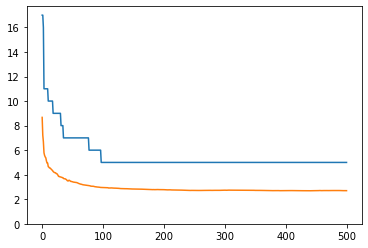

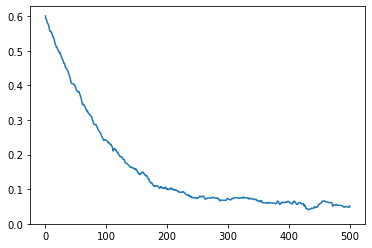

In [ ]:
plt.plot(Y1)
plt.plot(Y2)
plt.ylim([0,None])
plt.show()

plt.plot(Y3)
plt.ylim([0,None])
plt.show()

De nuevo. ¿Qué puedes decir respecto al comportamiento de las distancias y el clustering? ¿Cómo decaen? ¿Cuál decae más rápido?

## El "experimento" de Watts-Strogatz

Ahora que se ha generado un poco de intuición, se genera una nueva función más apegada a la propuesta de Watts y Strogatz. En esta, se parte de una red regular (que hemos llamado anillo) se le cambian un porcentaje de enlaces dados por una probabilidad $0 \le p \le 1$. 

A continucación se les proporciona la función ```re_enlazar``` que:
- toma la red y el parámetro $p$
- recorre todos los enlaces (originales) y con probabilidad $p$ los modifica.

El principio es el mismo que como se trabajó antes. Revisen el código con cuidado y jueguen con los parámetros.


In [ ]:
def re_enlazar(G, p):
  nodos = set(G)
  
  for enlace in G.edges():
    if np.random.rand() < p:
      u, v = enlace
      eleccion = nodos -{u} - set(G[u])
      nuevo_v = np.random.choice( list(eleccion) )
      G.remove_edge(u,v)
      G.add_edge(u, nuevo_v)

50.450450450450454
3.3806986986986987


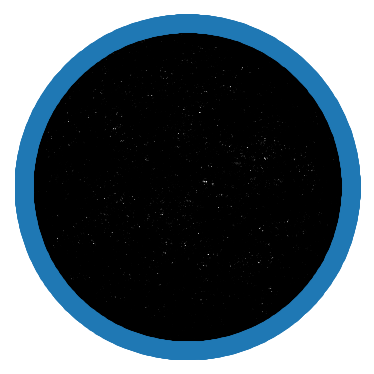

In [ ]:
N = 1000
l = 5

G = Anillo(N, l)
print(nx.average_shortest_path_length(G))

re_enlazar(G, .5)



plt.figure(figsize = [5,5])
nx.draw_circular(G)
print(nx.average_shortest_path_length(G))


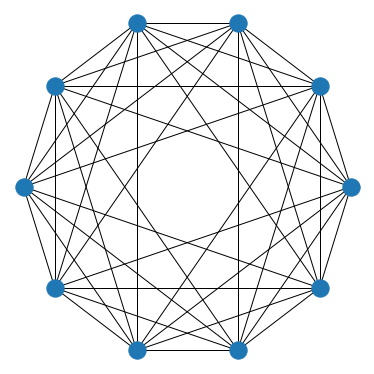

In [ ]:
plt.figure(figsize = [5,5])
G_2=nx.watts_strogatz_graph(10, 8, .0000001, seed=None)
nx.draw_circular(G_2)

In [ ]:
N = 600
l = 3
    
G = Anillo(N, l)
re_enlazar(G, 0)

Path_0=nx.average_shortest_path_length(G)
Clus_0=nx.average_clustering(G)

Path_Length=[nx.average_shortest_path_length(G)]
Clus_Coef=[nx.average_clustering(G)]

#print(Path_Length)
#print(Clus_Coef)
corridas=40
i=0
while i <corridas:
    try:
        G = Anillo(N, l)
        j=np.logspace(-4,0,corridas)[i]
        re_enlazar(G,j)
        
        Path_Norm=nx.average_shortest_path_length(G)/Path_0
        Clus_Norm=nx.average_clustering(G)/Clus_0
        
    
        Path_Length.append(Path_Norm)
        Clus_Coef.append(Clus_Norm)
        
        i+=1
        
    except Exception:
        pass
    
Path_Length.pop(0)
Clus_Coef.pop(0)
    
print(Path_Length)
print(Clus_Coef)
    
    
    
    




[1.0, 1.0, 1.0, 1.0, 0.7841940397350993, 0.8269072847682118, 0.8566920529801324, 0.7618818984547462, 1.0, 1.0, 0.5753798013245033, 0.8411038631346578, 0.5867354304635761, 0.4936323399558499, 0.7496017660044151, 0.454149889624724, 0.477501766004415, 0.38845673289183225, 0.3665217439293598, 0.29492770419426045, 0.3066751655629139, 0.2481448123620309, 0.23914580573951433, 0.1881110375275938, 0.18084977924944812, 0.14773178807947018, 0.13886953642384106, 0.13233443708609272, 0.12005187637969095, 0.11318344370860928, 0.10363366445916114, 0.10070717439293599, 0.09259426048565123, 0.08879183222958056, 0.08456732891832229, 0.08150386313465784, 0.07828565121412803, 0.07646501103752759, 0.07546280353200883, 0.07518918322295806]
[1.0, 1.0, 1.0, 1.0, 0.9990608465608468, 0.9990608465608464, 0.9984126984126984, 0.9984126984126984, 1.0, 1.0, 0.9957936507936509, 0.9977645502645504, 0.9930026455026455, 0.9899338624338619, 0.9974735449735449, 0.9878835978835979, 0.9898280423280423, 0.9830423280423276, 0

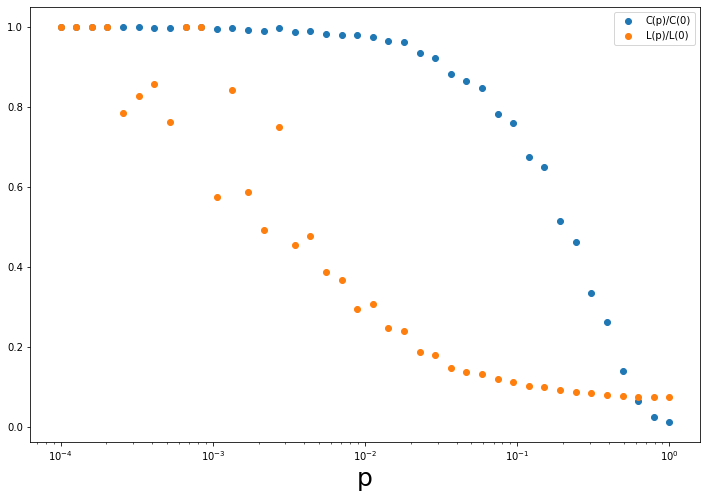

In [ ]:
plt.figure(figsize = [12,8])
plt.scatter(np.logspace(-4,0,corridas),Clus_Coef,label="C(p)/C(0)")
plt.scatter(np.logspace(-4,0,corridas),Path_Length,label="L(p)/L(0)")
plt.xscale("log")
plt.xlabel('p',fontsize=25)
plt.legend()
#plt.xlim(None,1)
#plt.show()
plt.savefig('WS4.jpg')





In [ ]:
len(np.logspace(-4,0,10))

10



Solo faltaría promediar los valores, para obtener una gráfica más consistente, tal cual se realizó en el artículo original.


